# Week 6 worksheet - GB cycling accidents

In the `data` folder of the course materials you should find a `CSV` file called `gb_cycling_accidents.csv` which contains data on bicycle accidents in Great Britain from 1970 to 2018. I retrieved the data set from [kaggle](https://www.kaggle.com/datasets/johnharshith/bicycle-accidents-in-great-britain-1979-to-2018), which cites [data.world](https://data.world/gonzandrobles/bicycleaccidentsuk) as the original source. Each row holds information about a specific accident, and each column holds information about the accident, such as the date, time of day, day of week, number of vehicles involved, weather conditions, severity, etc. Here is the full explanation of the columns in the data set.

| Variable             | Definition                                                                                |
|:---------------------|:------------------------------------------------------------------------------------------|
| Accident_Index       | Unique identifier for the accident. This may be thought of as the accident "case number". |
| Number_of_Vehicles   | Number of vehicles that were involved in the accident                                     |
| Number_of_Casualties | Number of casualties resulting from the accident                                          |
| Date                 | Date when the accident happened                                                           |
| Time                 | Time when the accident happened                                                           |
| Speed_limit          | Speed limit on the part of the road where the accident took place                         |
| Road_conditions      | Road condition (e.g., "frost") at the time and place of the accident                      |
| Weather_conditions   | Whether condition (e.g., "rain") at time and place of the accident                        |
| Day                  | Day of the week when the accident occurred                                                |
| Road_type            | Type of road (e.g., "Dual carriageway") where the accident happened                       |
| Light_conditions     | Light conditions (e.g., "Daylight") at time of accident                                   |
| Gender               | Whether the accident victim was Male or Female                                            |
| Severity             | How severe (e.g., "Serious") the accident was                                             |
| Age_Grp              | Age group of the accident victim                                                          |

Let's explore the frequency of accidents with respect to the different variables. 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

### **1.** Import `pandas` and read `data/gb_cycling_accidents.csv` into a `DataFrame`

In [25]:
df = pd.read_csv('../data/gb_cycling_accidents.csv')
df

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp
0,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,Male,Serious,36 to 45
1,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight,Male,Slight,46 to 55
2,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight,Male,Slight,46 to 55
3,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight,Male,Slight,36 to 45
4,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit,Male,Slight,46 to 55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827856,2018983118818,2,1,2018-02-07,14:55,30.0,Dry,Clear,Monday,Single carriageway,Daylight,Male,Slight,6 to 10
827857,2018983119218,2,1,2018-07-24,07:45,30.0,Dry,Clear,Tuesday,Single carriageway,Daylight,Male,Serious,56 to 65
827858,2018983120618,2,1,2018-10-08,13:25,20.0,Dry,Clear,Friday,Single carriageway,Daylight,Male,Serious,11 to 15
827859,2018983121918,2,1,2018-07-18,21:10,30.0,Dry,Clear,Wednesday,Single carriageway,Daylight,Male,Serious,46 to 55


### **2.** How many unique values are in the following columns?

  - `Speed_limit`
  - `Road_conditions`
  - `Weather_conditions`
  - `Road_type`
  - `Light_conditions`
  - `Gender`
  - `Severity`
  - `Age_Grp`

In [26]:
cols = [
    'Road_conditions', 
    'Weather_conditions', 
    'Road_type',
    'Light_conditions', 
    'Gender',
    'Severity',
    'Age_Grp'
]

for col in cols:
    print(f'{col}: {df[col].unique()}')


Road_conditions: ['Snow' 'Wet' 'Dry' 'Frost' 'Flood' 'Missing Data']
Weather_conditions: ['Unknown' 'Rain' 'Snow' 'Fog' 'Clear' 'Clear and windy' 'Other'
 'Rain and windy' 'Snow and windy' 'Missing data']
Road_type: ['Dual carriageway' 'Unknown' 'Single carriageway' 'Roundabout'
 'One way sreet' 'Slip road']
Light_conditions: ['Darkness lights lit' 'Daylight' 'Darkness no lights']
Gender: ['Male' 'Female' 'Other']
Severity: ['Serious' 'Slight' 'Fatal']
Age_Grp: ['36 to 45' '46 to 55' '16 to 20' '21 to 25' '26 to 35' '11 to 15'
 '56 to 65' '6 to 10' '66 to 75']


### **3.** What road conditions were associated with the most and least accidents? 

In [27]:
df.Road_conditions.value_counts()

Dry             633936
Wet             184279
Frost             6020
Snow              1710
Missing Data      1648
Flood              268
Name: Road_conditions, dtype: int64

### **4.** What weather conditions were associated with the most and least accidents? 

In [28]:
df.Weather_conditions.value_counts()

Clear              683162
Rain                82007
Unknown             24081
Clear and windy     11891
Other               11820
Rain and windy       8808
Fog                  3369
Snow                 2086
Snow and windy        483
Missing data          154
Name: Weather_conditions, dtype: int64

### **5.** What road type was associated with the most and least accidents? 

In [29]:
df.Road_type.value_counts()

Single carriageway    656703
Roundabout             75066
Dual carriageway       59037
Unknown                30647
One way sreet           5562
Slip road                846
Name: Road_type, dtype: int64

### **6.** What light conditions were associated with the most and least accidents? 

In [30]:
df.Light_conditions.value_counts()

Daylight               660657
Darkness lights lit    142039
Darkness no lights      25165
Name: Light_conditions, dtype: int64

### **7.** What speed limit was associated with the most and least accidents? 

In [31]:
df.Speed_limit.value_counts()

30.0     686784
60.0      58557
40.0      53337
70.0      11363
20.0      10836
50.0       6676
10.0        105
0.0          68
15.0         53
36.0         11
5.0          10
51.0          7
31.0          7
38.0          6
25.0          6
61.0          6
41.0          4
39.0          4
66.0          2
32.0          2
27.0          2
33.0          1
26.0          1
3.0           1
660.0         1
59.0          1
45.0          1
13.0          1
21.0          1
22.0          1
16.0          1
34.0          1
55.0          1
35.0          1
46.0          1
62.0          1
Name: Speed_limit, dtype: int64

### **8.** Based on the above, write a single sentence that summarises the conditions in which most accidents appeared to occur.

Most accidents occurred on single carriageway roads with a 30-MPH speed limit, in clear and dry daylight conditions.


### **9.** Create a bar chart showing how accidents were distributed by `Age_Grp`

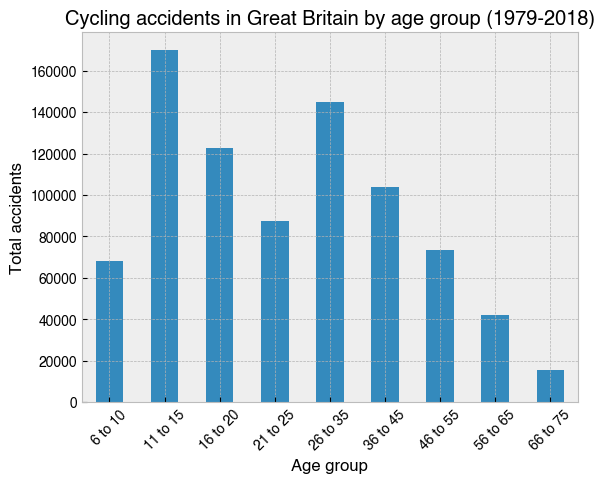

In [32]:
group_order = [
    '6 to 10',
    '11 to 15',
    '16 to 20',
    '21 to 25',
    '26 to 35',
    '36 to 45',
    '46 to 55',
    '56 to 65',
    '66 to 75'
]
ax = (
    df.groupby('Age_Grp')['Accident_Index']
    .count()[group_order]
    .plot(kind='bar', rot=45)
)
ax.set_xlabel('Age group')
ax.set_ylabel('Total accidents')
ax.set_title('Cycling accidents in Great Britain by age group (1979-2018)');

### **10.** Across all accidents, what percentage involved Males, what percentage involved Females, and what percentage involved people identifying as 'Other'? Show the results in a pie chart.

Male      0.797265
Female    0.202591
Other     0.000144
Name: Gender, dtype: float64


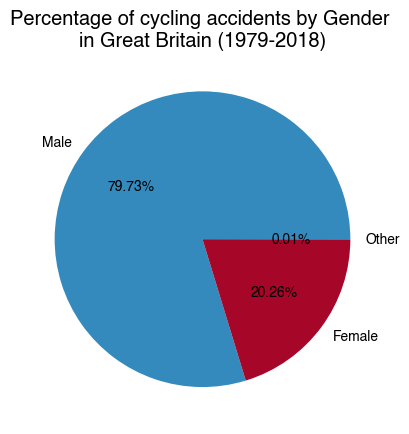

In [36]:
print(df.Gender.value_counts(normalize=True))
ax = (
    df.Gender.value_counts()
    .mul(100)
    .plot
    .pie(autopct='%1.2f%%')
)
ax.set_title('Percentage of cycling accidents by Gender \nin Great Britain (1979-2018)')
ax.set_ylabel('');

### **11.** What was the highest number of vehicles involved in a single accident?

In [11]:
df.Number_of_Vehicles.value_counts()

2     758784
1      41786
3      24955
4       1861
5        343
6         72
7         30
8         21
9          4
10         3
12         1
13         1
Name: Number_of_Vehicles, dtype: int64

### **12.** What was the highest number of casualties involved in a single accident?

In [12]:
df.Number_of_Casualties.value_counts()

1     792685
2      32367
3       2227
4        357
5        123
6         54
7         23
8          9
13         5
9          5
10         3
60         1
12         1
34         1
Name: Number_of_Casualties, dtype: int64

### **13.** On which day of the week did the accident with `Accident_Index` `201443N027074` occur?

In [13]:
df.loc[df.Accident_Index=='201443N027074']

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp
751599,201443N027074,2,1,2014-05-07,19:30,30.0,Dry,Clear,Saturday,Single carriageway,Daylight,Male,Serious,16 to 20


### **14.** Create a separate `DataFrame` for all serious accidents that happened on a Sunday in wet road conditions. How many were there?

In [14]:
df2 = df.loc[(
    (df.Severity=='Serious') 
    & (df.Day=='Sunday')
    & (df.Road_conditions=='Wet')
)]
df2

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp
9,197901A7PDD49,2,1,1979-07-01,15:15,30.0,Wet,Rain,Sunday,Unknown,Daylight,Male,Serious,11 to 15
107,197901ALMAE81,2,1,1979-01-21,12:00,30.0,Wet,Fog,Sunday,Single carriageway,Daylight,Male,Serious,56 to 65
657,197901D8LGF35,2,1,1979-08-04,11:30,30.0,Wet,Rain,Sunday,Single carriageway,Daylight,Male,Serious,6 to 10
1538,197901FOJEV59,2,1,1979-06-24,09:20,30.0,Wet,Rain,Sunday,Unknown,Daylight,Male,Serious,46 to 55
1542,197901FOPGC24,2,1,1979-06-24,15:30,30.0,Wet,Unknown,Sunday,Unknown,Daylight,Male,Serious,16 to 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826325,2018521902418,2,1,2018-02-12,16:56,20.0,Wet,Rain,Sunday,Single carriageway,Darkness lights lit,Male,Serious,26 to 35
826477,2018530806661,2,1,2018-07-29,18:50,30.0,Wet,Rain,Sunday,Single carriageway,Daylight,Male,Serious,46 to 55
827229,201863C114718,2,1,2018-09-30,15:35,30.0,Wet,Clear,Sunday,Single carriageway,Daylight,Male,Serious,46 to 55
827580,2018961800246,2,1,2018-07-15,11:00,60.0,Wet,Rain,Sunday,Single carriageway,Daylight,Female,Serious,56 to 65


### **15.** Create and assign a new [`DatetimeIndex`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) for the `DataFrame` using the `Date` and `Time` columns

In [15]:
df.index = pd.DatetimeIndex(df.Date + ' ' + df.Time)
df

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp
1979-01-01 18:20:00,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,Male,Serious,36 to 45
1979-02-01 09:15:00,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight,Male,Slight,46 to 55
1979-04-01 08:45:00,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight,Male,Slight,46 to 55
1979-04-01 13:40:00,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight,Male,Slight,36 to 45
1979-04-01 18:50:00,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit,Male,Slight,46 to 55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-07 14:55:00,2018983118818,2,1,2018-02-07,14:55,30.0,Dry,Clear,Monday,Single carriageway,Daylight,Male,Slight,6 to 10
2018-07-24 07:45:00,2018983119218,2,1,2018-07-24,07:45,30.0,Dry,Clear,Tuesday,Single carriageway,Daylight,Male,Serious,56 to 65
2018-10-08 13:25:00,2018983120618,2,1,2018-10-08,13:25,20.0,Dry,Clear,Friday,Single carriageway,Daylight,Male,Serious,11 to 15
2018-07-18 21:10:00,2018983121918,2,1,2018-07-18,21:10,30.0,Dry,Clear,Wednesday,Single carriageway,Daylight,Male,Serious,46 to 55


### **16.** Add a new column to the `DataFrame` called `long_date`. It should contain the correct dates matching the following format.

  - Wednesday 09 February 2012

In [23]:
df['long_date'] = df.index.strftime('%A %d %B %Y')
df.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp,long_date
1979-01-01 18:20:00,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,Male,Serious,36 to 45,Monday 01 January 1979
1979-02-01 09:15:00,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight,Male,Slight,46 to 55,Thursday 01 February 1979
1979-04-01 08:45:00,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight,Male,Slight,46 to 55,Sunday 01 April 1979
1979-04-01 13:40:00,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight,Male,Slight,36 to 45,Sunday 01 April 1979
1979-04-01 18:50:00,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit,Male,Slight,46 to 55,Sunday 01 April 1979


### **17.** What is the worst day on record in terms of the number of accidents that were reported?

In [16]:
df.groupby(df.index.date)['Accident_Index'].count().sort_values()

2010-12-25      2
2009-01-01      2
2017-10-12      3
2003-01-01      3
2007-12-25      3
             ... 
1984-07-23    152
1983-07-21    154
1983-07-25    154
1989-07-26    161
1983-11-25    166
Name: Accident_Index, Length: 14609, dtype: int64

### **18.** Make a bar chart showing total accidents by month of the year

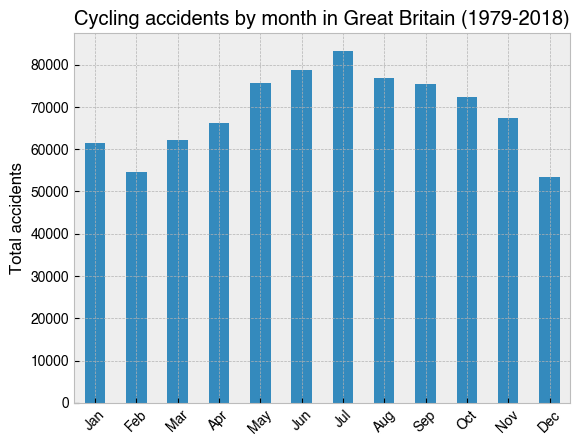

In [17]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = (
    df.groupby(df.index.month)['Accident_Index']
    .count()
    .plot(kind='bar')
)
ax.set_xticklabels(months, rotation=45)
ax.set_ylabel('Total accidents')
ax.set_title('Cycling accidents by month in Great Britain (1979-2018)');

### **19.** Make a line graph showing the total number of accidents that occurred each year from 1979-2018. Have accidents declined overall? In which years did the most and least cycling accidents occur? 

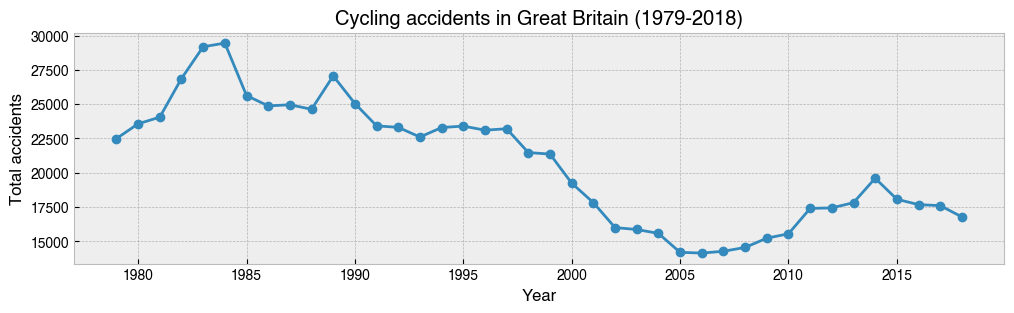

In [18]:
ax = (
    df.groupby(df.index.year)['Accident_Index']
    .count()
    .plot(kind='line', figsize=(12, 3), marker='o')
)
ax.set_ylabel('Total accidents')
ax.set_xlabel('Year')
ax.set_title('Cycling accidents in Great Britain (1979-2018)');

### **20.** Repeat the above, but this time with **separate lines for `Gender`**

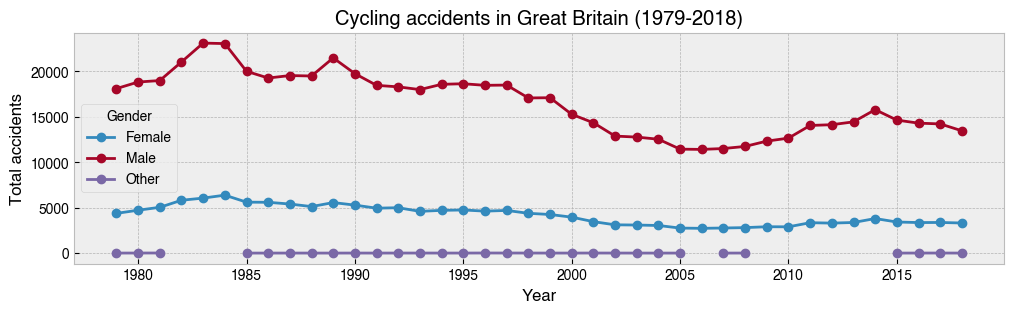

In [19]:
ax = (
    df.groupby([df.index.year, 'Gender'])['Accident_Index']
    .count()
    .unstack()
    .plot(kind='line', figsize=(12, 3), marker='o')
)
ax.set_ylabel('Total accidents')
ax.set_xlabel('Year')
ax.set_title('Cycling accidents in Great Britain (1979-2018)');

### **21.** Repeat the above, but this time with **separate lines for `Age_Grp`**

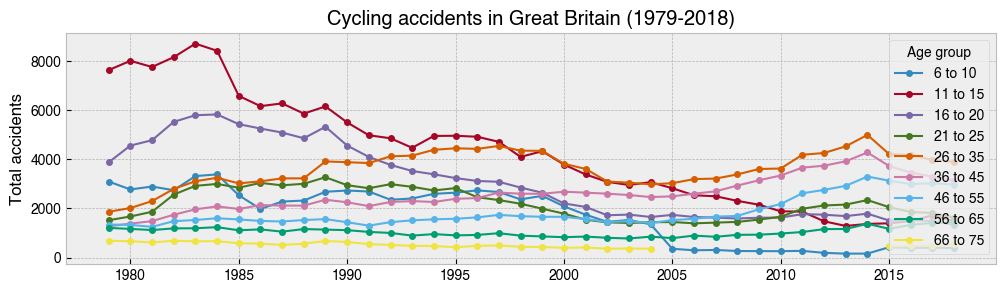

In [20]:
group_order = [
    '6 to 10',
    '11 to 15',
    '16 to 20',
    '21 to 25',
    '26 to 35',
    '36 to 45',
    '46 to 55',
    '56 to 65',
    '66 to 75'
]
ax = (
    df.groupby([df.index.year, 'Age_Grp'])['Accident_Index']
    .count()
    .unstack()[group_order]
    .plot(kind='line', figsize=(12, 3), marker='o', lw=1.5, ms=4)
)
ax.set_ylabel('Total accidents')
ax.set_title('Cycling accidents in Great Britain (1979-2018)')
ax.legend(title='Age group');

### **22.** Repeat the above, but this time with **separate subplots for `Severity`**

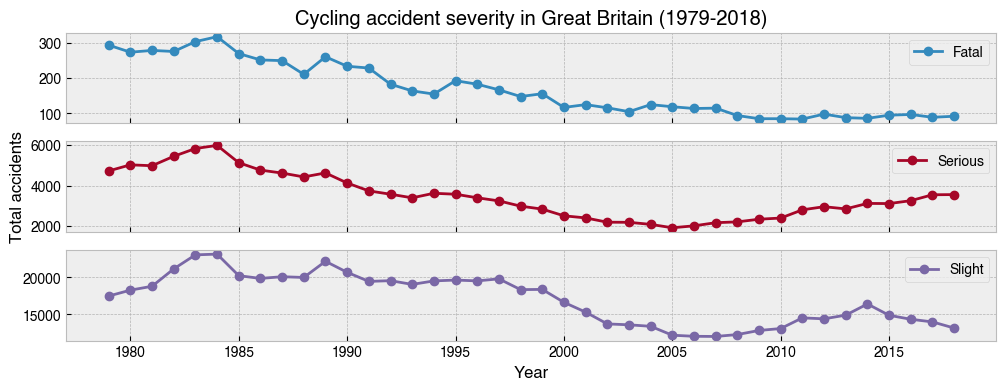

In [21]:
ax = (
    df.groupby([df.index.year, 'Severity'])['Accident_Index']
    .count()
    .unstack()
    .plot(kind='line', figsize=(12, 4), marker='o', subplots=True)
)
ax[1].set_ylabel('Total accidents')
ax[2].set_xlabel('Year')
ax[0].set_title('Cycling accident severity in Great Britain (1979-2018)');

### **23.** Make a bar chart showing the total number of accidents for each hour in the day from 1979-2018

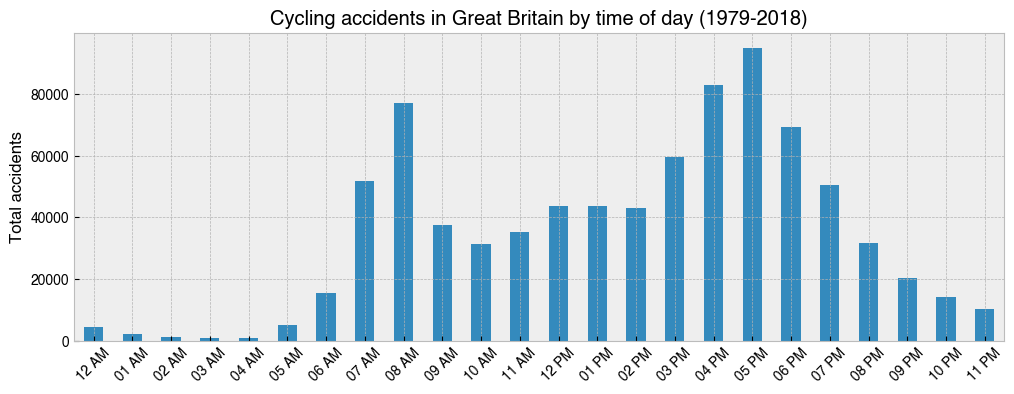

In [22]:
import datetime

ax = (
    df.groupby(df.index.hour)['Accident_Index']
    .count()
    .plot(kind='bar', figsize=(12, 4))
)
ax.set_ylabel('Total accidents')
ax.set_title('Cycling accidents in Great Britain by time of day (1979-2018)')
hours = [datetime.time(i).strftime('%I %p') for i in range(24)]
ax.set_xticklabels(hours, rotation=45);

### **24.** As above, but with stacked bars using different colours for each day of the week

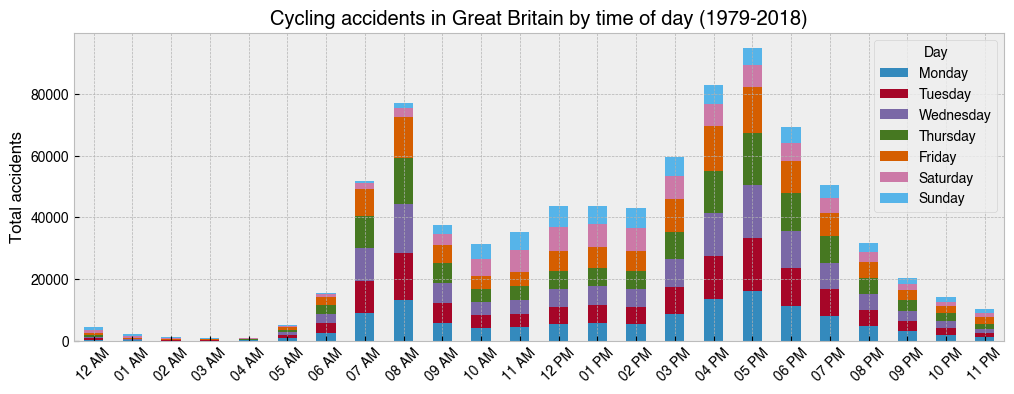

In [23]:
import datetime

group_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = (
    df.groupby([df.index.hour, 'Day'])['Accident_Index']
    .count()
    .unstack()[group_order]
    .plot(kind='bar', figsize=(12, 4), stacked=True)
)
ax.set_ylabel('Total accidents')
ax.set_title('Cycling accidents in Great Britain by time of day (1979-2018)')
hours = [datetime.time(i).strftime('%I %p') for i in range(24)]
ax.set_xticklabels(hours, rotation=45);

### **25.** Make a bar chart showing the year-on-year percentage change for accidents with different coloured bars for each `Severity`

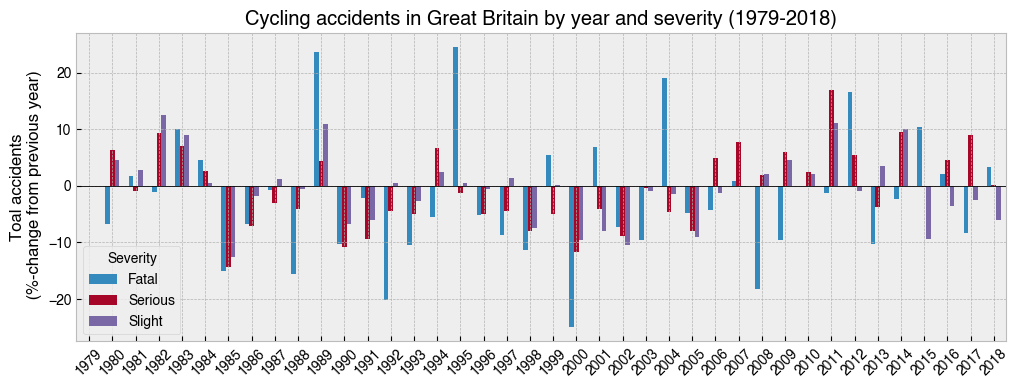

In [24]:
ax = (
    df.groupby([df.index.year, 'Severity'])['Accident_Index']
    .count()
    .unstack()
    .pct_change()
    .mul(100)
    .plot
    .bar(figsize=(12, 4), rot=45, width=.6)
)
ax.axhline(0, 0, 1, lw=.6, c='k')
ax.set_ylabel('Toal accidents\n (%-change from previous year)')
ax.set_title('Cycling accidents in Great Britain by year and severity (1979-2018)');